<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

Признаки: 
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата


Целевой признак:
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import time
import collections, numpy

df=pd.read_csv('/datasets/Churn.csv')
display(df.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Приведем названия колонок к нижнему регистру.

In [2]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             9091 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В колонке **tenure** есть пропуски. Посмотрим какую долю они составляют.

In [3]:
print(df['tenure'].isna().sum()/len(df['tenure'])*100)
print(df['tenure'].unique())

9.09
[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


9%. Заполним пропуски медианой, в зависимости от возраста, чтобы не оказалолось, что человек с возрастом 20 лет был клиентом банка на протяжении 10 лет. И приведем данные к целочисленному типу  

In [4]:
df['tenure']= df['tenure'].fillna(df.groupby('age')['tenure'].transform('median'))
df['tenure'] = df['tenure'].astype('int64', errors= 'ignore')
print(df['tenure'].unique())
print()
df.info()

[ 2  1  8  7  4  6  3 10  5  9  0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Пропуски заполнены. В колонке **tenure** теперь данные от 0 до 10 лет

Посмотрим содержание колонок с типом object: **geography** и **gender**

In [5]:
print(df['geography'].unique())

['France' 'Spain' 'Germany']


In [6]:
print(df['gender'].unique())

['Female' 'Male']


3 страны и 2 пола. Все нормально. 

Проверим есть ли дубликаты в данных

In [7]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Колонки **surname** (фамилия), **rownumber**(индекс строки в данных), **customerid**(порядковый номер клиента) не оказывают влияние на уход клиента из банка и не повлияют на обучение модели, но будут увеличивать размер таблицы (особенно **surname** после  кодирования)  и тормозить время обучения модели. Поэтому удалим эти колонки

In [8]:
df2 =df.drop(['surname', 'rownumber', 'customerid'], axis = 1)
display(df2.head())
print(df2.shape)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 11)


**Выводы.** Пропуски заполнены, дубликатов нет, удалены колонки с несущественными данными. 

## Исследование задачи

В данных есть колонки с категориальными признаками: **geography** и	**gender**. Для обучения моделей их необходимо преобразовать в численные. Для этого воспользуемся прямым кодированием One-Hot Encoding, тк оно подходит и для Логистической регресии и для моделей Решающее дерево и Случайный лес.  

In [9]:
df_ohe=pd.get_dummies(df2, drop_first=True)
display(df_ohe.head(3))
df_ohe.shape

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


(10000, 12)

12 колонок и 10000 строк. 

Разобъем данные на признаки и целевой признак. Целевой признак эток колонка **exited** — факт ухода клиента

In [10]:
target = df_ohe['exited'] # столбец с целевым признаком
features = df_ohe.drop(['exited'], axis=1) # таблица с признаками. 

Для обучения и проверки модели разобъем данные на 3 выборки: обучающая, валидационная и тестовая в пропорции 60:20:20

Для начала выделим 20% для тестовой выборки. 80% попадут в обучающую.

In [11]:
features_train, features_test, target_train, target_test = train_test_split(
        features,target,stratify=target, test_size=0.2, random_state=12345)

Теперь выделим 20% для валидационной выборки от обучающей выборки.

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(
        features_train, target_train, stratify=target_train,test_size=0.25, random_state=12345)

Приведем признаки к одному масштабу методом стандартизации данных. 

In [13]:
numeric=['balance', 'creditscore', 'age','numofproducts','estimatedsalary', 'tenure', 'numofproducts']
scaler=StandardScaler()
scaler.fit((features_train[numeric]))
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])
display(features_train.shape)
display(features_train.head())

(6000, 11)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
5536,-0.143332,0.577533,-0.000424,-1.220573,0.797767,1,1,1.029613,0,1,1
8530,1.632702,-0.564119,-1.091430,0.435807,-0.916018,1,0,0.237986,0,0,0
1762,1.116413,-0.468981,-1.455098,1.245822,-0.916018,1,1,-0.686104,0,0,0
9090,1.643028,0.006707,-0.000424,-1.220573,-0.916018,1,0,-0.391097,0,0,0
8777,-0.484083,-1.420358,-1.455098,1.421989,0.797767,1,0,-1.361559,0,1,1


Посмотрим на баланс классов в целевом признаке

0    0.7963
1    0.2037
Name: exited, dtype: float64


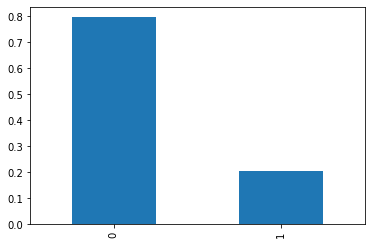

In [14]:
class_frequency=target.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
plt.show()

Наблюдается дисбаланс классов 4:1 

 Проверим модели без учёта дисбаланса

In [15]:
def model_metrics(model, features, target):  # функция для расчета метрик по модели и выборке для обучения.  
    model=model
    features=features
    target=target
    model.fit(features, target)
    predictions_valid=model.predict(features_valid) # проверка модели на валидационной выборке
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:,1]
    print('Точность:', precision_score(target_valid, predictions_valid))
    print('Полнота:', recall_score(target_valid, predictions_valid))
    print('F1:',f1_score(target_valid, predictions_valid))
    print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

Модель **Решающее дерево**

Определим  по валидационной выборке с какой глубиной дерева получается наилучший результат с долей правильных ответов.

In [16]:
best_model= None
best_result=0
for depth in range (1,10):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    result = model_tree.score(features_valid, target_valid)
    if result>best_result:
        best_model= model_tree
        best_result= result
print(best_model)
print('Accuracy:', best_result)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')
Accuracy: 0.855


С max_depth=7 получается доля правильных ответов 0.855

Проверим с max_depth=7  какие получаются метрики Точность, Полнота и F1

In [17]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7)
model_metrics(tree, features_train, target_train)

Точность: 0.7489361702127659
Полнота: 0.43243243243243246
F1: 0.5482866043613708
AUC-ROC: 0.8285581421174641
CPU times: user 37.6 ms, sys: 26 µs, total: 37.7 ms
Wall time: 35.2 ms


F1 получается 0.54. Это меньше чем 0.59

Модель **Случайный лес**

Определим по валидационной выборке с какими параметрами получается наилучший результат с долей правильных ответов.
Проверять будем гиперпараметры max_depth и n_estimators

In [18]:
best_model= None
best_result=0
for depth in range (1,10):
    for est in range(1,20):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth,  n_estimators=est)
        model_forest.fit(features_train, target_train)
        result = model_forest.score(features_valid, target_valid)
        if result>best_result:
            best_model= model_forest
            best_result= result
print(best_model)
print(best_result)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)
0.8615


С max_depth=9 и n_estimators=18 получается доля правильных ответов 0.86

Проверим с max_depth=9 и n_estimators=18 какие получаются метрики Точность, Полнота и F1

In [19]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model_metrics(forest, features_train, target_train)

Точность: 0.8066037735849056
Полнота: 0.4201474201474201
F1: 0.5525040387722132
AUC-ROC: 0.8630795664693971
CPU times: user 161 ms, sys: 0 ns, total: 161 ms
Wall time: 175 ms


F1 получается 0.55. Это меньше чем 0.59

Модель **Логистическая регрессия**

Модель имеет мало парамеров и не склонна к переобучению. Проверим какие получаются метрики Точность, Полнота и F1

In [20]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear')
model_metrics(regress, features_train, target_train)

Точность: 0.671875
Полнота: 0.2113022113022113
F1: 0.3214953271028037
AUC-ROC: 0.7875595163730758
CPU times: user 100 ms, sys: 41.3 ms, total: 141 ms
Wall time: 92.8 ms


F1 получается 0.32. Это значительно меньше чем 0.59. И крайне низкий показатель Полноты. Те модель плохо ищет положительные объекты

Посмотрим на данные всех моделей в таблице.

In [57]:
data_wo_balance = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.548, 0.552, 0.321],'AUC-ROC': [0.828, 0.863, 0.787], 'time_perfomance, ms':[35.2, 175, 92.8],
         'params':[ 'max_depth=7','max_depth=9 и n_estimators=18',' ']}
df_pivot = pd.DataFrame.from_dict(data_wo_balance )
display(df_pivot)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.548,0.828,35.2,max_depth=7
1,Случайный лес,0.552,0.863,175.0,max_depth=9 и n_estimators=18
2,Логистическая регрессия,0.321,0.787,92.8,


У всех моделей без учета баланса классов при проверке на тестовой выборке метрика F1 меньше 0.59. Особенно он низкий у модели Логистическая регрессия = 0.32. 

## Борьба с дисбалансом

### Взвешивание классов

Во всех моделях сделаем веса классов сбалансироваными, указав гиперпараметр class_weight='balanced'

**Решающее дерево**

In [22]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7, class_weight='balanced')
model_metrics(tree, features_train, target_train)

Точность: 0.45
Полнота: 0.773955773955774
F1: 0.5691056910569106
AUC-ROC: 0.8157140191038496
CPU times: user 37.7 ms, sys: 55 µs, total: 37.8 ms
Wall time: 36.1 ms


F1 увеличилось, но не значительно: до  0.569. Без учета баланса было 0.552

**Случайный лес**

In [23]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9, class_weight='balanced')
model_metrics(forest, features_train, target_train)

Точность: 0.5806451612903226
Полнота: 0.6633906633906634
F1: 0.6192660550458717
AUC-ROC: 0.860557013099386
CPU times: user 148 ms, sys: 3.81 ms, total: 152 ms
Wall time: 182 ms


F1 увеличилось и стало больше 0.59. AUC-ROC тоже достоточно высокий= 0.86.  

 **Логистическая регрессия**

In [24]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_metrics(regress, features_train, target_train)

Точность: 0.39569313593539707
Полнота: 0.7223587223587223
F1: 0.5113043478260869
AUC-ROC: 0.7917917917917918
CPU times: user 127 ms, sys: 54.1 ms, total: 181 ms
Wall time: 147 ms


F1 увеличилось значительно с 0.321 и стала 0.511, но это все равно меньше 0.59. 

Посмотрим на данные всех моделей в таблице.

In [58]:
data_balanced = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.569, 0.619, 0.511], 'AUC-ROC': [0.815, 0.860, 0.791], 'time_perfomance, ms':[36.1, 182, 147],
         'params':[ 'max_depth=7 и class_weight=balanced','max_depth=9, n_estimators=18 и class_weight=balanced',
                   'solver=liblinear и class_weight=balanced']}
df_pivot_balanced = pd.DataFrame.from_dict(data_balanced )
display(df_pivot_balanced)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.569,0.815,36.1,max_depth=7 и class_weight=balanced
1,Случайный лес,0.619,0.860,182.0,"max_depth=9, n_estimators=18 и class_weight=ba..."
2,Логистическая регрессия,0.511,0.791,147.0,solver=liblinear и class_weight=balanced


C гиперпараметром class_weight='balanced' метрика F1 увеличилось у всех моделей, но только у модели Случайный лес она стала выше 0.59, хотя по времени она выполняет расчеты дольше всех. AUC-ROC у всех моделей больше случайной модели, равное 0.5

### Увеличение выборки

Придадим объектам редкого класса больший вес. При анализе баланса классов выше мы выяснили, что отрицательные объекты относятся к положительным в пропорции 4:1. Поэтому будем увеличивать объекты положительного класса

In [26]:
def upsample(features, target, repeat): #Функция для увеличения положительных объектов в выборке на n-кол-во раз(repeat)
    features_zeros=features[target==0]
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    features_upsampled=pd.concat([features_zeros]+[features_ones]*repeat)
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled,random_state=12345)
    return features_upsampled, target_upsampled

Сначала попробуем увеличить класс в 2 раза.

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 2)
print(features_upsampled.shape)
print(target_upsampled.shape)

(7223, 11)
(7223,)


**Решающее дерево**

In [28]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7)
model_metrics(tree, features_upsampled, target_upsampled)

Точность: 0.585
Полнота: 0.5749385749385749
F1: 0.5799256505576208
AUC-ROC: 0.831453178910806
CPU times: user 41.4 ms, sys: 39 µs, total: 41.4 ms
Wall time: 75 ms


Метрики F1 и AUC-ROC немного увеличились, по сравнению в предыдущим методом. Но F1 все еще меньше 0.59

**Случайный лес**

In [29]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model_metrics(forest,features_upsampled, target_upsampled)


Точность: 0.7055016181229773
Полнота: 0.5356265356265356
F1: 0.6089385474860335
AUC-ROC: 0.8663062137638409
CPU times: user 169 ms, sys: 4.18 ms, total: 173 ms
Wall time: 186 ms


AUC-ROC немного увеличилось, но F1 меньше чем при взвешивании классов (было 0.619), хотя и выше 0.59

 **Логистическая регрессия**

In [30]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear')
model_metrics(regress, features_upsampled, target_upsampled)


Точность: 0.55
Полнота: 0.4864864864864865
F1: 0.516297262059974
AUC-ROC: 0.7899563662275526
CPU times: user 100 ms, sys: 72.9 ms, total: 173 ms
Wall time: 171 ms


F1 незначительно увеличилось, а AUC-ROC немного снизилось. Но F1 все еще меньше  0.59

Посмотрим на данные всех моделей в таблице.

In [59]:
data_upsamlpeX2 = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.579, 0.608, 0.516], 'AUC-ROC': [0.831, 0.866, 0.789], 'time_perfomance, ms':[75, 186, 171],
         'params':[ 'max_depth=7','max_depth=9, n_estimators=18 ',
                   'solver=liblinear']}
df_pivot_upsamlpeX2 = pd.DataFrame.from_dict(data_upsamlpeX2)
display(df_pivot_upsamlpeX2)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.579,0.831,75,max_depth=7
1,Случайный лес,0.608,0.866,186,"max_depth=9, n_estimators=18"
2,Логистическая регрессия,0.516,0.789,171,solver=liblinear


При увеличении в выборке положительных объектов в 2 раза, у моделей Решающее дерево и Логистическая регрессия F1 немного увеличилось, но не превысило порог в 0.59, а вот у Случайного леса F1 оказалось меньше(0.608), чем при методе взвешивания классов(0.619), хотя при этом метрика все же больше 0.59.
Время расчета у всех моделей увеличилось (ввиду того что данных в выборке стало больше)

Попробуем увеличить класс в 3 раза

In [32]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)
print(features_upsampled.shape)
print(target_upsampled.shape)

(8446, 11)
(8446,)


**Решающее дерево**

In [33]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7)
model_metrics(tree, features_upsampled, target_upsampled)

Точность: 0.45348837209302323
Полнота: 0.7665847665847666
F1: 0.5698630136986301
AUC-ROC: 0.8139009579687546
CPU times: user 57.9 ms, sys: 55 µs, total: 58 ms
Wall time: 67.4 ms


И F1 и AUC-ROC ниже чем при выборке, увеличенной в 2 раза.

**Случайный лес**

In [34]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model_metrics(forest, features_upsampled, target_upsampled)

Точность: 0.586864406779661
Полнота: 0.6805896805896806
F1: 0.6302616609783845
AUC-ROC: 0.8651193566447803
CPU times: user 264 ms, sys: 0 ns, total: 264 ms
Wall time: 273 ms


Метрика F1 немного увеличилась (стала 0.630) по сравнению с использованием выборки, увеличенной в 2 раза (было 0.608). AUC-ROC осталось примерно таким же

**Логистическая регрессия**

In [35]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear')
model_metrics(regress, features_upsampled, target_upsampled)

Точность: 0.45438898450946646
Полнота: 0.6486486486486487
F1: 0.5344129554655871
AUC-ROC: 0.7911871810176895
CPU times: user 131 ms, sys: 43 ms, total: 174 ms
Wall time: 193 ms


Метрики F1 и AUC-ROC немного увеличились, по сравнению в предыдущим методом. Но F1 все еще меньше 0.59

Посмотрим на данные всех моделей в таблице.

In [60]:
data_upsamlpeX3 = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.569, 0.630, 0.534], 'AUC-ROC': [0.813, 0.865, 0.791], 'time_perfomance, ms':[67.4, 273, 193],
         'params':[ 'max_depth=7','max_depth=9, n_estimators=18 ',
                   'solver=liblinear ']}
df_pivot_upsamlpeX3 = pd.DataFrame.from_dict(data_upsamlpeX3)
display(df_pivot_upsamlpeX3)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.569,0.813,67.4,max_depth=7
1,Случайный лес,0.630,0.865,273.0,"max_depth=9, n_estimators=18"
2,Логистическая регрессия,0.534,0.791,193.0,solver=liblinear


При увеличении в выборке положительных объектов в 3 раза у модели Решающее дерево метрики F1 и AUC-ROC мнемного снизились, по сравнению с выборкой, увеличенной в 2 раза. У модели Случайный лес метрики F1 и AUC-ROC еще немного повысились. В логистичекой регресии F1 и AUC-ROC также немного увеличились, но F1 не превысило 0.59.

Только у модели Случайный лес получилось превысить порог F1=0.59

Попробуем увеличить класс в 4 раза

In [37]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(features_upsampled.shape)
print(target_upsampled.shape)

(9669, 11)
(9669,)


**Решающее дерево**

In [38]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7)
model_metrics(tree, features_upsampled, target_upsampled)

Точность: 0.4512893982808023
Полнота: 0.773955773955774
F1: 0.5701357466063348
AUC-ROC: 0.815963883760494
CPU times: user 48 ms, sys: 0 ns, total: 48 ms
Wall time: 73.9 ms


**Случайный лес**

In [39]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model_metrics(forest, features_upsampled, target_upsampled)


Точность: 0.5461254612546126
Полнота: 0.7272727272727273
F1: 0.6238145416227608
AUC-ROC: 0.866505951251714
CPU times: user 211 ms, sys: 3.73 ms, total: 215 ms
Wall time: 228 ms


**Логистическая регрессия**

In [40]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear')
model_metrics(regress, features_upsampled, target_upsampled)

Точность: 0.38998682476943347
Полнота: 0.7272727272727273
F1: 0.5077186963979418
AUC-ROC: 0.7918581138920122
CPU times: user 104 ms, sys: 60.8 ms, total: 165 ms
Wall time: 141 ms


Посмотрим на данные всех моделей в таблице.

In [61]:
data_upsamlpeX4 = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.570, 0.623, 0.507], 'AUC-ROC': [0.815, 0.866, 0.791], 'time_perfomance, ms':[73.9, 228, 141],
         'params':[ 'max_depth=7 ','max_depth=9, n_estimators=18 ',
                   'solver=liblinear ']}
df_pivot_upsamlpeX4 = pd.DataFrame.from_dict(data_upsamlpeX4)
display(df_pivot_upsamlpeX4)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.570,0.815,73.9,max_depth=7
1,Случайный лес,0.623,0.866,228.0,"max_depth=9, n_estimators=18"
2,Логистическая регрессия,0.507,0.791,141.0,solver=liblinear


У модели Решающее дерево метрики остались примерно те же. У моделей Случайный лес и Логистическая регрессия F1 снизилось по сравнению с выборкой, увеличенной в 3 раза. Опять же только у модели Случайный лес получилось превысить  порог F1= 0.59.  Дальнейшее увеличение приведет к падению метрик

Оптимальным вариантом будет увеличение выборки в 3 раза

### Уменьшение выборки

Попробуем метод уменьшения в выброке отрицательных объектов

In [42]:
def downsample(features, target, fraction):#Функция для уменьшения отрицательных  объектов в выборке на n-долю (fraction)
    features_zeros=features[target==0]
    features_ones=features[target==1]
    target_zeros=target[target==0]
    target_ones=target[target==1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)]+[features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled,random_state=12345)
    return features_downsampled, target_downsampled

Сначала уменьшим выборку на 0.4

In [43]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

**Решающее дерево**

In [44]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7)
model_metrics(tree, features_downsampled, target_downsampled)

Точность: 0.5479744136460555
Полнота: 0.6314496314496314
F1: 0.58675799086758
AUC-ROC: 0.8230117636897298
CPU times: user 38.5 ms, sys: 357 µs, total: 38.8 ms
Wall time: 68.5 ms


**Случайный лес**

In [45]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model_metrics(forest, features_downsampled, target_downsampled)

Точность: 0.6189320388349514
Полнота: 0.6265356265356266
F1: 0.6227106227106227
AUC-ROC: 0.8639618046397707
CPU times: user 155 ms, sys: 0 ns, total: 155 ms
Wall time: 169 ms


**Логистическая регрессия**

In [46]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear')
model_metrics(regress,features_downsampled, target_downsampled)

Точность: 0.4827586206896552
Полнота: 0.5503685503685504
F1: 0.5143513203214696
AUC-ROC: 0.7896370947218406
CPU times: user 83.1 ms, sys: 89.5 ms, total: 173 ms
Wall time: 107 ms


Посмотрим на данные всех моделей в таблице.

In [62]:
data_downsamlpeX3 = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.586, 0.622, 0.514], 'AUC-ROC': [0.823, 0.863, 0.789], 'time_perfomance, ms':[68.5, 169, 107],
         'params':[ 'max_depth=7 ','max_depth=9, n_estimators=18 ',
                   'solver=liblinear ']}
df_pivot_downsamlpeX3 = pd.DataFrame.from_dict(data_downsamlpeX3)
display(df_pivot_downsamlpeX3)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.586,0.823,68.5,max_depth=7
1,Случайный лес,0.622,0.863,169.0,"max_depth=9, n_estimators=18"
2,Логистическая регрессия,0.514,0.789,107.0,solver=liblinear


Только у модели Случайный лес получилось превысить порог F1=0.59. Но метрики F1 и AUC-ROC все же ниже чем при балансировке выборки методом увеличения положительных объектов в 3 раза. У модели Решающее дерево метрика F1 максимально приблизилась к порогу 0.59. У логистической регресии и F1 и  AUC-ROC самые низкие

Уменьшим выборку на 0.5

In [48]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.5)

**Решающее дерево**

In [49]:
%%time
tree = DecisionTreeClassifier(random_state=12345, max_depth=7)
model_metrics(tree, features_downsampled, target_downsampled)

Точность: 0.5421412300683371
Полнота: 0.5847665847665847
F1: 0.5626477541371158
AUC-ROC: 0.824062891859502
CPU times: user 28.8 ms, sys: 4.38 ms, total: 33.2 ms
Wall time: 58 ms


**Случайный лес**

In [50]:
%%time
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model_metrics(forest, features_downsampled, target_downsampled)

Точность: 0.6611111111111111
Полнота: 0.5847665847665847
F1: 0.620599739243807
AUC-ROC: 0.865343772123433
CPU times: user 120 ms, sys: 0 ns, total: 120 ms
Wall time: 125 ms


**Логистическая регрессия**

In [51]:
%%time
regress= LogisticRegression(random_state=12345, solver='liblinear')
model_metrics(regress,features_downsampled, target_downsampled)

Точность: 0.5437158469945356
Полнота: 0.48894348894348894
F1: 0.5148771021992238
AUC-ROC: 0.7894982810237048
CPU times: user 90.4 ms, sys: 66.6 ms, total: 157 ms
Wall time: 159 ms


Посмотрим на данные всех моделей в таблице.

In [63]:
data_downsamlpeX4 = {'model': ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия'], 
        'F1': [0.562, 0.620, 0.514], 'AUC-ROC': [0.824, 0.865, 0.789], 'time_perfomance, ms':[58, 125, 159],
         'params':[ 'max_depth=7 ','max_depth=9, n_estimators=18 ',
                   'solver=liblinear ']}
df_pivot_downsamlpeX4 = pd.DataFrame.from_dict(data_downsamlpeX4)
display(df_pivot_downsamlpeX4)

,model,F1,AUC-ROC,"time_perfomance, ms",params
0,Решающее дерево,0.562,0.824,58,max_depth=7
1,Случайный лес,0.620,0.865,125,"max_depth=9, n_estimators=18"
2,Логистическая регрессия,0.514,0.789,159,solver=liblinear


У логистической регрессии метрики почти не изменились, а у моделей Случайный лес и Решающее дерево они снизились. И только у модели Случайный лес F1 превысило порог 0.59. Дальнейшее увеличению приведет к падению метрик. В данном методе оптимальным будет уменьшение на 0.4

**Выводы**. Во всех методах борьбы с дисбалансом только у модели Случайный лес получилось превысить порог F1 =0.59. Эта модель показывает лучшие метрики при балансировки выборки метом upsample положительных объектов в 3 раза. 

## Тестирование модели

Объединим валидационную и обучающую выборки

In [53]:
features_train_upd = pd.concat([features_train]+[features_valid])
target_train_upd = pd.concat([target_train]+[target_valid])

Проверим лучшую модель Случайный лес на тестовой выборке: n_estimators=18, max_depth=9, upsample = 3 

Точность: 0.6017699115044248
Полнота: 0.6683046683046683
F1: 0.6332945285215367
AUC-ROC: 0.8672007909296044


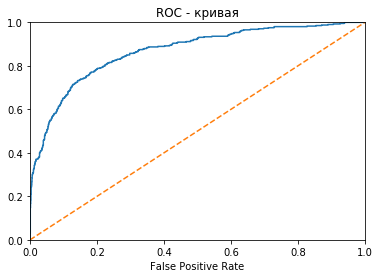

In [54]:
features_upsampled, target_upsampled = upsample(features_train_upd, target_train_upd, 3)
forest = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
forest.fit(features_upsampled, target_upsampled)
predictions_test=forest.predict(features_test) 
probabilities_test = forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()  
plt.plot(fpr, tpr) #ROC-кривая модели 
plt.plot([0,1],[0,1], linestyle='--')  #ROC-кривая случайной модели 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.title('ROC - кривая')
print('Точность:', precision_score(target_test, predictions_test))
print('Полнота:', recall_score(target_test, predictions_test))
print('F1:',f1_score(target_test, predictions_test))
print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_test))

F1 получилось 0.633. AUC-ROC тоже достаточно высокий= 0.867, выше случайной модели (AUC-ROC=0.5)

Проверим модель на адекватность

Сначала проверим, что модель не предсказывает только какой-то один класс.

In [55]:
collections.Counter(predictions_test)

Counter({1: 452, 0: 1548})

Предсказывает оба класса

Теперь сравним  модель с константной моделью, которая любому объекту пронозирует класс "0" (тк этого класса большинство)

In [56]:
predictions_train = pd.Series(target_train_upd.replace(1, 0))
print('F1:',f1_score(target_train_upd, predictions_train))
print('AUC-ROC:', roc_auc_score(target_train_upd, predictions_train))

F1: 0.0
AUC-ROC: 0.5


У модели метрики F1 и AUC-ROC выше чем у константной модели

**Вывод.** Модели удалось превысить порог F1=0.59, модель обучена и адекватна.